<h1 align ="center"> REST API Reference Samples</h1>
<hr>
   
# Get Embeddings
   
Get a vector representation of a given input that can be easily consumed by machine learning models and other algorithms.
In this example, we'll see how to get embeddings using REST API Call.

In [1]:
import json
import requests
import openai
import os

### Setup Parameters


Here we will load the configurations from _config.json_ file to setup deployment_name, openai_api_base, openai_api_key and openai_api_version.

In [ ]:
# Load config values
with open(r'config.json') as config_file:
    config_details = json.load(config_file)
    
# Setting up the deployment name
deployment_name = config_details['EMBEDDINGS_MODEL']

# The base URL for your Azure OpenAI resource. e.g. "https://<your resource name>.openai.azure.com"
openai_api_base = config_details['OPENAI_API_BASE']

# The API key for your Azure OpenAI resource.
openai_api_key = config_details['OPENAI_API_KEY']

# Currently OPENAI API have the following versions available: 2022-12-01
openai_api_version = config_details['OPENAI_API_VERSION']

print (deployment_name,openai_api_base,openai_api_key)

In [3]:
# Request URL
api_url = f"{openai_api_base}/openai/deployments/{deployment_name}/embeddings?api-version={openai_api_version}"

# Example prompt for request payload
input="The food was delicious and the waiter..."

# Json payload
json_data = {
  "input": input
}

# Setting the API key in the HTTP headers
headers =  {"api-key": openai_api_key}

try:
    # The response will contain embeddings, which you can extract, save, and use.
    response = requests.post(api_url, json=json_data, headers=headers)

    # Getting the JSON object of the result
    embeddings = response.json()
    
    # Print embeddings
    print(embeddings['data'][0]['embedding'][:20])
    
except:
    print("An exception has occurred. \n")
    print("Error Message:", embeddings['error']['message'])

[0.0023481972, -0.009284899, 0.01570119, -0.007710972, -0.0047217803, 0.014863454, -0.009849736, -0.038281962, -0.006930355, -0.028660698, 0.025182828, 0.018112851, -0.0036048, -0.02557631, 0.00049978524, -0.016361222, 0.02827991, 0.0053500817, 0.009652995, -0.016386608]


### Ejercicio 1: Comparar la similitud entre dos frases usando embeddings
# Genera embeddings para dos frases diferentes y calcula la similitud coseno entre ellos.

In [5]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

sentence1 = "The food was amazing and the atmosphere was great."
sentence2 = "The meal was tasty and the environment was pleasant."

json_data1 = {"input": sentence1}
json_data2 = {"input": sentence2}

response1 = requests.post(api_url, json=json_data1, headers=headers)
response2 = requests.post(api_url, json=json_data2, headers=headers)

embedding1 = response1.json()['data'][0]['embedding']
embedding2 = response2.json()['data'][0]['embedding']

# Convertimos los embeddings a matrices numpy 2D para usar cosine_similarity
embedding1 = np.array(embedding1).reshape(1, -1)
embedding2 = np.array(embedding2).reshape(1, -1)

similarity = cosine_similarity(embedding1, embedding2)
print(f"Similarity between sentences: {similarity[0][0]}")


Similarity between sentences: 0.9481576082430035


### Ejercicio 2: Clasificación de texto simple usando embeddings
# Genera embeddings para un conjunto de textos y clasifica si pertenecen a la categoría 'positivo' o 'negativo'.


In [6]:
texts = ["I love this product!", "It's terrible, I will not buy it again.", "Absolutely fantastic experience.", "The worst service ever."]
labels = ["positive", "negative", "positive", "negative"]

embeddings = []
for text in texts:
    json_data = {"input": text}
    response = requests.post(api_url, json=json_data, headers=headers)
    embeddings.append(response.json()['data'][0]['embedding'])

for i, embedding in enumerate(embeddings):
    print(f"Text: {texts[i]} - Label: {labels[i]} - Embedding: {embedding[:5]}")


Text: I love this product! - Label: positive - Embedding: [-0.01093095, 0.0032429998, -0.011792726, -0.022535771, -0.013918009]
Text: It's terrible, I will not buy it again. - Label: negative - Embedding: [-0.022774734, -0.00881582, -0.015034635, -0.001327147, -0.018764649]
Text: Absolutely fantastic experience. - Label: positive - Embedding: [-0.012397227, -0.0013213849, 0.005783872, -0.02723789, -0.028446747]
Text: The worst service ever. - Label: negative - Embedding: [-0.014438531, -0.019273035, 0.0043763956, -0.006647443, -0.015881086]


### Ejercicio 3: Visualización de embeddings en 2D usando PCA
# Usa PCA para reducir las dimensiones de los embeddings y visualízalos en un gráfico 2D.

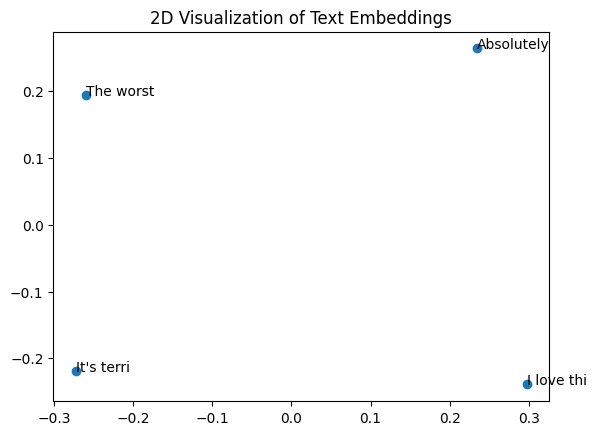

In [9]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings)

plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1])
for i, text in enumerate(texts):
    plt.annotate(text[:10], (embeddings_2d[i, 0], embeddings_2d[i, 1]))
plt.title("2D Visualization of Text Embeddings")
plt.show()

### Ejercicio 4: Búsqueda de texto similar en una base de datos de embeddings
# Dado un texto de consulta, encuentra el texto más cercano en una lista de documentos almacenados.

In [17]:
query = "I really enjoyed the food."
json_data_query = {"input": query}
response_query = requests.post(api_url, json=json_data_query, headers=headers)
query_embedding = response_query.json()['data'][0]['embedding']

similarities = cosine_similarity([query_embedding], embeddings)
most_similar_index = np.argmax(similarities)

print(f"Most similar text to query: {texts[most_similar_index]}")

Most similar text to query: Absolutely fantastic experience.
